## CIFAKE Dataset

In [1]:
!wget https://www.inf.ufpr.br/acgbas19/cifake-dataset.zip
!unzip -d cifake-dataset cifake-dataset.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


: 

## Módulos

In [ ]:
import cv2
import glob
import numpy as np
import os
import tensorflow as tf

from sklearn.model_selection import train_test_split

## Conjuntos de treinamento e de validação (Train set | Validation Set)

In [ ]:
dataset_dir = "./cifake-dataset/"
trainset_dir = dataset_dir + "train/"
testset_dir = dataset_dir + "test/"

X = []
y = []

for filename in glob.glob(trainset_dir + "**/*.jpg"):
  img = cv2.imread(filename)
  X.append(img)
  if "FAKE" in filename:
    y.append(0)
  else:
    y.append(1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)/255
y_train = np.array(y_train)

X_val = np.array(X_val)/255
y_val = np.array(y_val)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((80000, 32, 32, 3), (80000,), (20000, 32, 32, 3), (20000,))

In [ ]:
X_train[0], y_train[0]

(array([[[0.08627451, 0.08235294, 0.09019608],
         [0.09019608, 0.08627451, 0.09411765],
         [0.05882353, 0.05490196, 0.0627451 ],
         ...,
         [0.88235294, 0.87843137, 0.88627451],
         [0.89411765, 0.89019608, 0.89803922],
         [0.8       , 0.79607843, 0.80392157]],
 
        [[0.08235294, 0.07843137, 0.08627451],
         [0.09019608, 0.08627451, 0.09411765],
         [0.0627451 , 0.05882353, 0.06666667],
         ...,
         [0.83137255, 0.82745098, 0.83529412],
         [0.87843137, 0.8745098 , 0.88235294],
         [0.82352941, 0.81960784, 0.82745098]],
 
        [[0.07843137, 0.0745098 , 0.08235294],
         [0.09019608, 0.08627451, 0.09411765],
         [0.06666667, 0.0627451 , 0.07058824],
         ...,
         [0.8       , 0.79607843, 0.80392157],
         [0.8745098 , 0.87058824, 0.87843137],
         [0.85098039, 0.84705882, 0.85490196]],
 
        ...,
 
        [[0.43137255, 0.42745098, 0.43529412],
         [0.40392157, 0.4       , 0.40784

## Conjunto de teste (Test set)

In [ ]:
X = []
y = []

for filename in glob.glob(testset_dir + "**/*.jpg"):
  img = cv2.imread(filename)
  X.append(img)
  if "FAKE" in filename:
    y.append(0)
  else:
    y.append(1)

X_test = np.array(X)/255
y_test = np.array(y)

In [ ]:
X_test.shape, y_test.shape

((20000, 32, 32, 3), (20000,))

## Importing **"keras"** for CNN

In [ ]:
from tensorflow.keras import models , layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping

ef_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

model = Sequential()
model.add(ef_model)
model.add(Flatten())
# model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 14,715,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MODEL_OUTPUT_DIR = './vgg16-model/'
!rm -rf vgg16-model
!mkdir -p vgg16-model

trainning_patience = 5
num_epochs = 50

checkpoint_filepath = os.path.join(MODEL_OUTPUT_DIR, 'models', '{0}_model.{1}-{2}.h5'.format('vgg16', '{epoch:02d}', '{val_loss:.7f}'))
checkpoint_callback = ModelCheckpoint(checkpoint_filepath, save_best_only=True, verbose=1)
csv_callback = CSVLogger(os.path.join(MODEL_OUTPUT_DIR, 'training_log.csv'))
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=trainning_patience, verbose=1)
callbacks=[csv_callback, checkpoint_callback, early_stopping_callback]

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=num_epochs,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
2500/2500 [==============================] - ETA: 0s - loss: 0.3380 - accuracy: 0.8531
Epoch 1: val_loss improved from inf to 0.22335, saving model to ./vgg16-model/models/vgg16_model.01-0.2233485.h5
2500/2500 [==============================] - 88s 29ms/step - loss: 0.3380 - accuracy: 0.8531 - val_loss: 0.2233 - val_accuracy: 0.9097
Epoch 2/50
2499/2500 [============================>.] - ETA: 0s - loss: 0.2291 - accuracy: 0.9089
Epoch 2: val_loss improved from 0.22335 to 0.19982, saving model to ./vgg16-model/models/vgg16_model.02-0.1998219.h5
2500/2500 [==============================] - 80s 32ms/step - loss: 0.2291 - accuracy: 0.9089 - val_loss: 0.1998 - val_accuracy: 0.9222
Epoch 3/50
2500/2500 [==============================] - ETA: 0s - loss: 0.8860 - accuracy: 0.8671
Epoch 3: val_loss did not improve from 0.19982
2500/2500 [==============================] - 72s 29ms/step - loss: 0.8860 - accuracy: 0.8671 - val_loss: 0.4701 - val_accuracy: 0.7691
Epoch 4/50
2499/2500 [==

In [ ]:
from tensorflow.keras.models import load_model

models = glob.glob('./vgg16-model/models/*.h5')
best_model = max(models, key=os.path.getctime)
MODEL_PATH = best_model
print('Using model {0} for testing.'.format(MODEL_PATH))
model = load_model(MODEL_PATH)

Using model ./vgg16-model/models/vgg16_model.16-0.1246641.h5 for testing.


In [ ]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 5s 8ms/step - loss: 0.1296 - accuracy: 0.9509


[0.12964525818824768, 0.9509000182151794]

In [ ]:
y_pred = model.predict(X_test)

625/625 [==============================] - 4s 7ms/step


In [ ]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[1, 1, 1, 1, 1]

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

print('Classification Report     : \n\n\n' , classification_report(y_test, y_pred_label))

Classification Report     : 


               precision    recall  f1-score   support

           0       0.95      0.95      0.95     10000
           1       0.95      0.95      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_label)

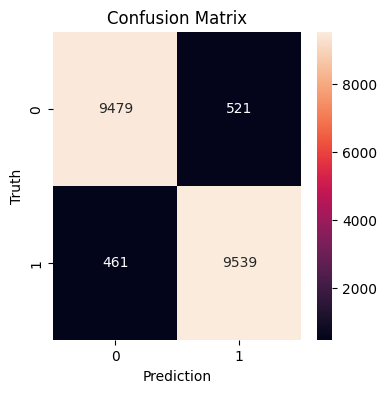

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn


plt.figure(figsize=(4,4), facecolor= 'white', edgecolor='brown')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()